# <center>RETO Agentes contaminantes</center>

In [1]:
%reset -f # Elimina todas las variables del entorno

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  elimina, please run `%reset?` for details
Don't know how to reset  todas, please run `%reset?` for details
Don't know how to reset  las, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details
Don't know how to reset  del, please run `%reset?` for details
Don't know how to reset  entorno, please run `%reset?` for details


In [2]:
%pip install matplotlib qt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement qt (from versions: none)
ERROR: No matching distribution found for qt


In [ ]:
#%pip install missingno 
# Libreria para la visualización de los valores nulos

In [ ]:

# Define la ruta de la carpeta donde están los archivos CSV
# La ruta es una cadena de texto cruda (raw string) que permite incluir barras invertidas sin que se interpreten como caracteres de escape
carpeta = r'Modulo 3\Reto_RNN'

# Lista para almacenar los DataFrames individuales
# Aquí se va a ir guardando cada DataFrame que se genere a partir de los archivos CSV
dataframes = []

# Leer y almacenar las columnas relevantes de cada archivo CSV
# Se recorre cada archivo en la carpeta especificada
for archivo in os.listdir(carpeta):
    # Verifica que el archivo termine en '.csv' para asegurarse de que estamos leyendo solo archivos CSV
    if archivo.endswith('.csv'):
        # Leer el archivo CSV
        # Utiliza pandas para leer el archivo CSV y almacenarlo en un DataFrame
        df = pd.read_csv(os.path.join(carpeta, archivo))
        
        # Seleccionar las columnas relevantes
        # Se define una lista con las columnas que queremos mantener del DataFrame original
        ##columnas_relevantes = ['Fecha', 'Hora']
        # Añadimos las columnas específicas de cada zona que queremos conservar
        ##for zona in ['Noroeste', 'Noreste', 'Centro', 'Suroeste', 'Sureste']:
        ##   columnas_relevantes.append(f'{zona} PM10')
          ##  columnas_relevantes.append(f'{zona} monóxido de carbono')
        
        # Filtrar el DataFrame para conservar solo las columnas relevantes
        # Creamos un nuevo DataFrame que solo contiene las columnas especificadas en la lista 'columnas_relevantes'
        #df_relevante = df[columnas_relevantes]
        
        # Añadir el DataFrame filtrado a la lista
        # Se agrega el DataFrame filtrado a la lista 'dataframes'
        #dataframes.append(df_relevante)

# Combinar todos los DataFrames en uno solo
# Utilizamos pandas para concatenar todos los DataFrames de la lista 'dataframes' en un único DataFrame
##data_combinada = pd.concat(dataframes, ignore_index=True)
# Concatenar por columnas result = pd.concat([df1, df2], axis=1)

# Guardar el DataFrame combinado en un nuevo archivo CSV
# Guardamos el DataFrame combinado en un archivo CSV llamado 'data_combinada.csv'
##data_combinada.to_csv('data_combinada.csv', index=False)

# Mostrar las primeras filas del DataFrame combinado
# Mostramos las primeras filas del DataFrame combinado para verificar que se ha creado correctamente
DAT.head()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
import csv

In [72]:
# Cargar el DataFrame
df = pd.read_csv(r'C:\Users\mvelazquez\OneDrive - Giddings Berries Chile S.A\Escritorio\Diplomado-IA\Modulo 3\Reto_RNN\Datos_ejercicio.csv')
df.describe().round() # Podemos redondear los valores de salida 
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


In [77]:
##Reemplazar valores -99 con NaN
df.replace(-99, np.nan, inplace=True)

#Asegurarse de que a partir de la segunda columna todos los valores sean numéricos
for col in df.columns[1:]:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la columna 'Fecha' al formato específico
df['Fecha'] = pd.to_datetime(df['fecha'])

# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df[df['fecha'].isna()]
if not invalid_dates.empty:
  print("Fechas no convertidas correctamente:")
  print(invalid_dates)


In [81]:

# Formatear la columna 'Fecha' al formato 'YYYY-MM-DD'
##df['Fecha'] = df['fecha'].dt.strftime('%Y-%m-%d')

# Crear columna Fecha
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)
df.sort_index(inplace=True)
df.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,Fecha,Año,Mes
fecha,,,,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,2015-01-01,2015,1
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN,2015-01-02,2015,1
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,2015-01-03,2015,1
2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061,2015-01-04,2015,1
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789,2015-01-05,2015,1


In [ ]:
msno.matrix(df) # Visualización de los datos nulos

In [82]:

# Descripción por año
df['Año'] = df.index.year
df['Mes'] = df.index.month

# Calcular valores nulos por año
nulos_por_año = df.isnull().groupby(df['Año']).sum()

# Calcular valores nulos por mes para cada año
nulos_por_mes = df.isnull().groupby([df['Año'], df['Mes']]).sum()

In [83]:
nulos_por_año

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,Fecha,Año,Mes
Año,,,,,,,,,,,
2015,13,16,11,18,19,18,15,12,0,0,0
2016,15,18,22,9,24,21,16,20,0,0,0
2017,16,20,26,22,12,15,17,11,0,0,0
2018,19,20,15,11,26,13,21,14,0,0,0
2019,24,25,17,16,17,19,13,21,0,0,0
2020,22,19,18,20,18,14,23,16,0,0,0
2021,19,13,16,17,16,14,15,15,0,0,0
2022,17,18,23,20,16,21,20,18,0,0,0
2023,12,6,9,9,9,7,5,10,0,0,0


In [ ]:
nulos_por_mes

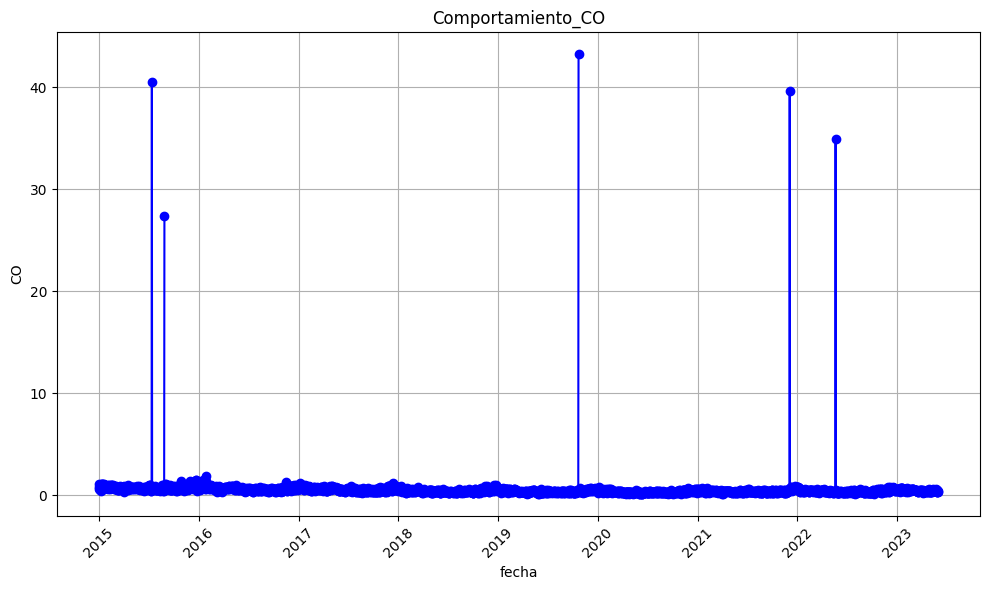

In [96]:
# Graficar la series temporal
inicio= '2016-01-01'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CO'], marker='o', linestyle='-', color='b')
plt.title('Comportamiento_CO')
plt.xlabel('fecha')
plt.ylabel('CO')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

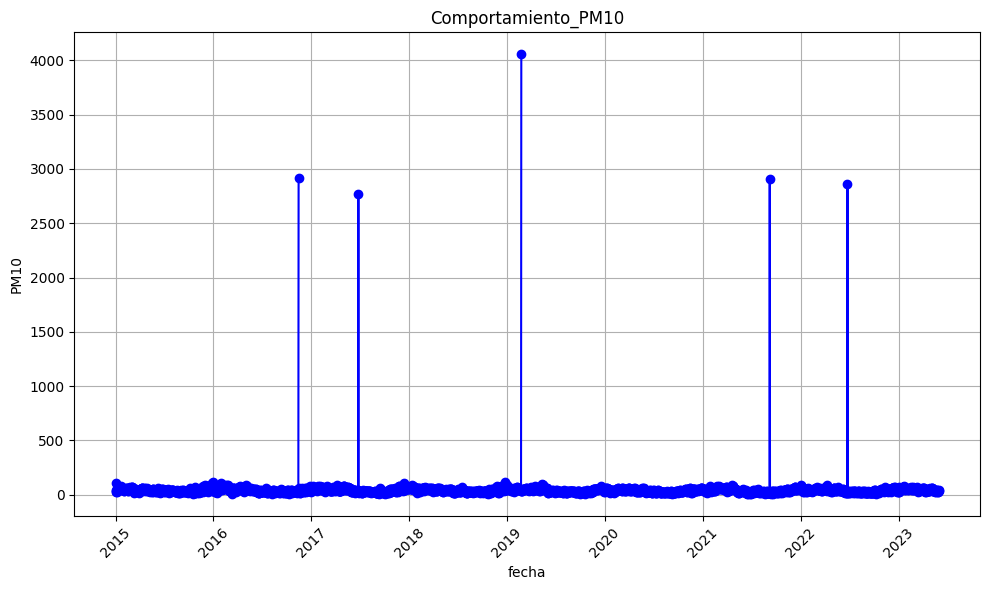

In [100]:
# Graficar la series temporal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM10'], marker='o', linestyle='-', color='b')
plt.title('Comportamiento_PM10')
plt.xlabel('fecha')
plt.ylabel('PM10')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

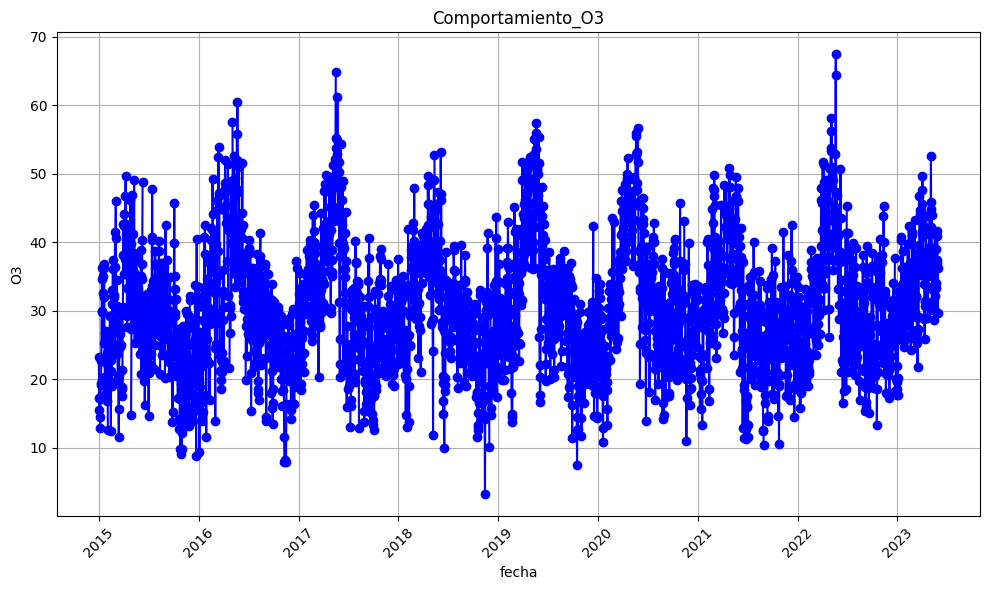

In [98]:
# Graficar la series temporal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['O3'], marker='o', linestyle='-', color='b')
plt.title('Comportamiento_O3')
plt.xlabel('fecha')
plt.ylabel('O3')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Imputación de valores faltantes

### Metodo 1

Primeras filas del DataFrame filtrado:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2016-01-01  0.962269  13.831140  29.712719  43.567982  33.471014  115.334071   
2016-01-02  0.610673   7.929515  21.085903  29.006608  24.540835   42.101990   
2016-01-03  0.711463  16.601382  26.645161  43.267281  19.586792   45.245033   
2016-01-04  0.916995  33.433566  31.664336  65.149184   9.396190   57.624709   
2016-01-05       NaN  49.722222  24.656085  74.378307  17.697917   35.979960   

                 PM25        SO2  
fecha                             
2016-01-01  86.909910  21.117647  
2016-01-02  24.508711   5.218673  
2016-01-03  28.209677  17.517157  
2016-01-04  39.484099  12.179361  
2016-01-05  21.185915   2.578249  


<Figure size 1200x600 with 0 Axes>

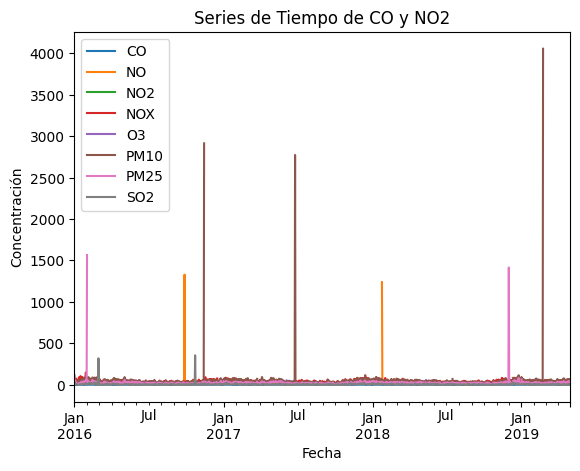


Número de valores nulos antes de la imputación:
CO      57
NO      65
NO2     68
NOX     45
O3      67
PM10    58
PM25    58
SO2     53
dtype: int64

Primeras filas del DataFrame después de la imputación y adición de columnas:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2016-01-01  0.962269  13.831140  29.712719  43.567982  33.471014  115.334071   
2016-01-02  0.610673   7.929515  21.085903  29.006608  24.540835   42.101990   
2016-01-03  0.711463  16.601382  26.645161  43.267281  19.586792   45.245033   
2016-01-04  0.916995  33.433566  31.664336  65.149184   9.396190   57.624709   
2016-01-05  0.804474  49.722222  24.656085  74.378307  17.697917   35.979960   

                 PM25        SO2  julian_day  
fecha                                         
2016-01-01  86.909910  21.117647           1  
2016-01-02  24.508711   5.218673           2  
2016-01-03  28.209677  

<Figure size 1200x600 with 0 Axes>

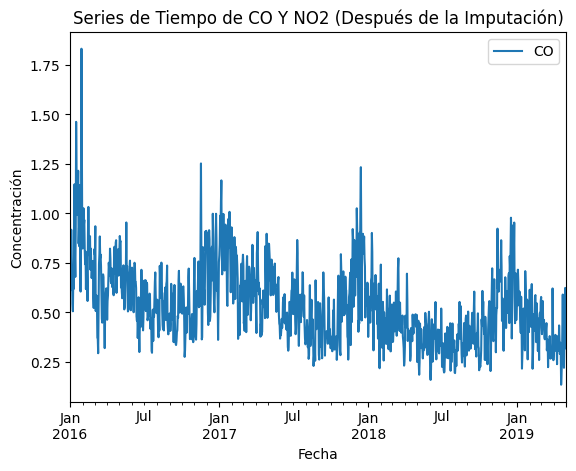

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
df_impute = df[['CO','NO','NO2','NOX','O3','PM10','PM25','SO2']].loc['2016-01-01':'2019-05-01']

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo de algunas variables
plt.figure(figsize=(12, 6))
df_impute.plot()
plt.title('Series de Tiempo de CO y NO2')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())

# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = imputer_knn.fit_transform(df_impute)

# Agregar una columna con el día juliano (día del año)
df_impute['julian_day'] = df_impute.index.dayofyear

# Mostrar las primeras filas del DataFrame después de la imputación y adición de columnas
print("\nPrimeras filas del DataFrame después de la imputación y adición de columnas:")
print(df_impute.head())

# Contar y mostrar el número de valores nulos después de la imputación
print("\nNúmero de valores nulos después de la imputación:")
print(df_impute.isnull().sum())

# Graficar las series de tiempo de 'CE' y 'NO' después de la imputación
plt.figure(figsize=(12, 6))
df_impute[['CO']].plot()
plt.title('Series de Tiempo de CO Y NO2 (Después de la Imputación)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()


# 5. Aplicando Redes Neuronales Recurrentes

In [104]:
! pip install tensorflow

^C


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras import backend as K


def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2):
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Paso 1: Leer el archivo CSV
file_path = 'Datos_procesados.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")


In [ ]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 24
future_steps = 12
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CE-CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CE-CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)


In [ ]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

In [ ]:
# Crear y entrenar el modelo LSTM
model_lstm = create_lstm_model(input_shape, output_size, future_steps)
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_lstm)

In [ ]:
# Crear y entrenar el modelo GRU
model_gru = create_gru_model(input_shape, output_size, future_steps)
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_gru)

In [ ]:
# Evaluar los modelos en el conjunto de evaluación
loss_simple_rnn, rmse_simple_rnn = model_simple_rnn.evaluate(X_eval, y_eval)
print(f"SimpleRNN - Loss en el conjunto de evaluación: {loss_simple_rnn}")
print(f"SimpleRNN - RMSE en el conjunto de evaluación: {rmse_simple_rnn}")

loss_lstm, rmse_lstm = model_lstm.evaluate(X_eval, y_eval)
print(f"LSTM - Loss en el conjunto de evaluación: {loss_lstm}")
print(f"LSTM - RMSE en el conjunto de evaluación: {rmse_lstm}")

loss_gru, rmse_gru = model_gru.evaluate(X_eval, y_eval)
print(f"GRU - Loss en el conjunto de evaluación: {loss_gru}")
print(f"GRU - RMSE en el conjunto de evaluación: {rmse_gru}")

In [ ]:
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

In [ ]:
# Visualizar predicciones y errores para el modelo LSTM
plot_final_prediction(model_lstm, X_eval, y_eval, scalers, output_columns, future_steps, title='LSTM - Predicciones en el conjunto de evaluación')
plot_final_errors(model_lstm, X_eval, y_eval, scalers, output_columns, future_steps, title='LSTM - Errores en el conjunto de evaluación')

In [ ]:


# Visualizar predicciones y errores para el modelo GRU
plot_final_prediction(model_gru, X_eval, y_eval, scalers, output_columns, future_steps, title='GRU - Predicciones en el conjunto de evaluación')
plot_final_errors(model_gru, X_eval, y_eval, scalers, output_columns, future_steps, title='GRU - Errores en el conjunto de evaluación')



In [ ]:
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}
    
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

In [ ]:
model_simple_rnn.save('model_rnn.keras')
model_gru.save('model_gru.keras')
model_lstm.save('model_lstm.keras')

import joblib
import os

def save_scalers(scalers, directory):
    """
    Guarda los escaladores en archivos separados.

    Args:
        scalers (dict): Diccionario de escaladores.
        directory (str): Directorio donde se guardarán los escaladores.
    """
    # Crear el directorio si no existe
    os.makedirs(directory, exist_ok=True)
    
    # Guardar cada escalador en un archivo separado
    for column, scaler in scalers.items():
        file_path = os.path.join(directory, f'{column}_scaler.pkl')
        joblib.dump(scaler, file_path)
        print(f"Escalador para {column} guardado en {file_path}")


save_scalers(scalers, 'scalers')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import backend as K
import joblib
import os

# Cargar el archivo CSV
file_path = 'Datos_procesados.csv'
df = pd.read_csv(file_path)

# Definición de funciones

def load_scalers(directory, columns):
    """
    Carga los escaladores desde archivos separados.

    Args:
        directory (str): Directorio desde donde se cargarán los escaladores.
        columns (list): Lista de nombres de columnas para las cuales se cargan los escaladores.

    Returns:
        dict: Diccionario de escaladores cargados.
    """
    scalers = {}
    
    # Cargar cada escalador desde su archivo
    for column in columns:
        file_path = os.path.join(directory, f'{column}_scaler.pkl')
        if os.path.exists(file_path):
            scalers[column] = joblib.load(file_path)
            print(f"Escalador para {column} cargado desde {file_path}")
        else:
            print(f"No se encontró el archivo {file_path} para {column}")
    
    return scalers

def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps, scalers):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.
    
    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
        scalers (dict): Diccionario de escaladores.
        
    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].transform(data[[col]])
    
    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)
    
    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)
    
    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)
    
    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)
    
    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)
    
    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.
    
    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')
    
    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()

# Cargar los escaladores
columns = df.columns
loaded_scalers = load_scalers('scalers', columns)

# Cargar el modelo entrenado
model = tf.keras.models.load_model('model_rnn.keras', custom_objects={'rmse': rmse})

# Definir parámetros
time_steps = 24
future_steps = 12
input_columns = ['CE-CO', 'CE-PM10', 'julian_day', 'hour']
output_columns = ['CE-CO']
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model, df, input_columns, output_columns, time_steps, future_steps, loaded_scalers)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)


## En desarrollo


In [ ]:


def calculate_nowcast(data, window=12):
    """
    Calcula el nowcast basado en una ventana móvil sobre los datos de concentración.

    Args:
        data (pd.Series): Serie temporal de datos de concentración.
        window (int, optional): Tamaño de la ventana móvil. Por defecto es 12.

    Returns:
        np.ndarray: Arreglo con los valores de nowcast calculados.
    """
    # Inicializar el arreglo de nowcast con NaN
    nowcast = np.full(len(data), np.nan, dtype=np.float16)
    
    # Iterar sobre los datos comenzando desde el índice 'window - 1'
    for i in range(window - 1, len(data)):
        # Obtener los datos de la ventana actual
        window_data = data.iloc[i - window + 1:i + 1].to_numpy()
        
        # Calcular el valor máximo y mínimo de la ventana
        C_max = np.nanmax(window_data)
        C_min = np.nanmin(window_data)
        
        # Calcular el peso 'w' basado en la diferencia entre el máximo y el mínimo
        w = 1 - (C_max - C_min) / C_max if C_max != 0 else 0
        
        # Ajustar el peso 'W' para que no sea menor a 0.5
        W = w if w > 0.5 else 0.5
        
        # Calcular los pesos para cada valor en la ventana
        weights = np.where(~np.isnan(window_data), W ** np.arange(window), 0)
        
        # Sumar los pesos, ignorando los NaN
        weights_sum = np.nansum(weights)
        
        # Si en los últimos tres valores de la ventana hay como máximo dos NaN
        if np.count_nonzero(np.isnan(window_data[-3:])) <= 2:
            # Calcular el nowcast como la media ponderada de los valores en la ventana
            nowcast[i] = np.round(np.nansum(window_data * weights) / weights_sum)
    
    return nowcast

# Lista de concentraciones
concentraciones = [13, np.nan, 10, 21, 74, 64, 53, 82, 90, 75, 80, 50]

# Convertir la lista en una Serie de pandas
concentraciones_series = pd.Series(concentraciones)

# Aplicar la función calculate_nowcast
nowcast_result = calculate_nowcast(concentraciones_series)

# Mostrar los resultados
print(nowcast_result)



In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame ficticio
np.random.seed(42)
data = {
    'Fecha': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Variable1': np.random.randn(100),
    'Variable2': np.random.randn(100),
    'Variable3': np.random.randn(100)
}

df = pd.DataFrame(data)

# Introducir valores faltantes
df.loc[df.sample(frac=0.1).index, 'Variable1'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Variable2'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Variable3'] = np.nan

print(df.head(10))
df_media = df.copy()
df_media['Variable1'] = df_media['Variable1'].fillna(df_media['Variable1'].mean())
df_media['Variable2'] = df_media['Variable2'].fillna(df_media['Variable2'].mean())
df_media['Variable3'] = df_media['Variable3'].fillna(df_media['Variable3'].mean())


In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.impute import KNNImputer

df_knn = df.copy()
imputer_knn = KNNImputer(n_neighbors=5)
df_knn.iloc[:, 1:] = imputer_knn.fit_transform(df_knn.iloc[:, 1:])
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice = df.copy()
imputer_mice = IterativeImputer()
df_mice.iloc[:, 1:] = imputer_mice.fit_transform(df_mice.iloc[:, 1:])


In [ ]:
def summary_statistics(df, method):
    summary = df.describe().T[['mean', 'std']]
    summary['method'] = method
    return summary

summary_original = summary_statistics(df.dropna(), 'Original')
summary_media = summary_statistics(df_media, 'Media')
summary_knn = summary_statistics(df_knn, 'KNN')
summary_mice = summary_statistics(df_mice, 'MICE')

summary_df = pd.concat([summary_original, summary_media, summary_knn, summary_mice])
print(summary_df)
